# Load data

In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os


positive_path = "inria dataset/INRIAPerson/train_64x128_H96/pos/"
negative_path = "inria dataset/INRIAPerson/Train/neg/"

IM_WIDTH = 96
IM_HEIGHT = 160


PARAMETER = 1218
TEST_PARAMETER = int(PARAMETER / 6)


def normalize(data):
    data = np.divide(data,255)
    data = data - 0.5
    return data

def loadPositiveImages(path):
    files = os.listdir(path)
    data = np.ndarray((PARAMETER - TEST_PARAMETER,3,IM_HEIGHT, IM_WIDTH))
    testData = np.ndarray((TEST_PARAMETER,3,IM_HEIGHT, IM_WIDTH))
    for i in range (PARAMETER- TEST_PARAMETER):
        image = cv2.imread(path + files[i])
#         print(image.shape)
#         image = image.reshape((1,IM_WIDTH * IM_HEIGHT * 3))
        image = np.transpose(image,(2,0,1))
        image = normalize(image)
        data[i,:] = image
    print('done loading positive data')
    for i in range(TEST_PARAMETER):
        image = cv2.imread(path + files[PARAMETER + i])
        image = np.transpose(image,(2,0,1))
        image = normalize(image)
        testData[i,:] = image
    print('done loading positive test')
    return (data, testData)

def loadNegativeImages(path):
    files = os.listdir(path)
    print('desired amount: ',PARAMETER + TEST_PARAMETER + 1)
    print('available amount: ', len(files))
    counter = 0
    data = np.ndarray((PARAMETER - TEST_PARAMETER,3,IM_HEIGHT, IM_WIDTH))
    testData = np.ndarray((TEST_PARAMETER,3,IM_HEIGHT, IM_WIDTH))
    while counter < PARAMETER - TEST_PARAMETER :
        image = cv2.imread(path + files[counter])
#         print('image:', image.shape)
        x_range = image.shape[1] - IM_WIDTH
        y_range = image.shape[0] - IM_HEIGHT
        image = np.transpose(image,(2,0,1))
        for i in range(0, min(10,IM_WIDTH,IM_HEIGHT)):
            x = np.random.randint(0,x_range)
            y = np.random.randint(0,y_range)
            subimage = image[:, y : y + IM_HEIGHT, x : x + IM_WIDTH]
#             subimage = np.transpose(subimage(2,0,1))
#             print('subimage: ',subimage.shape)
#             subimage = subimage.reshape((1,IM_WIDTH * IM_HEIGHT * 3))
            subimage = normalize(subimage)
            data[counter,:] = subimage
    
            counter += 1
            if counter >= PARAMETER - TEST_PARAMETER: break
    print('done loading negative data')
    while counter < PARAMETER  :
        image = cv2.imread(path + files[counter])
        x_range = image.shape[1] - IM_WIDTH
        y_range = image.shape[0] - IM_HEIGHT
        image = np.transpose(image,(2,0,1))
        for i in range(0, min(10,IM_WIDTH,IM_HEIGHT)):
            x = np.random.randint(0,x_range)
            y = np.random.randint(0,y_range)
            subimage = image[:, y : y + IM_HEIGHT, x : x + IM_WIDTH]
            subimage = normalize(subimage)
            testData[counter - PARAMETER,:] = subimage
    
            counter += 1
#             print("counter: ", counter)
            if counter >= PARAMETER + TEST_PARAMETER - 1 : break
    return (data,testData)

(positive_data, positive_test_data) = loadPositiveImages(positive_path)

positive_data = positive_data.astype('float')
positive_test_data = positive_test_data.astype('float')

(negative_data,negative_test_data) = loadNegativeImages(negative_path)
negative_data = negative_data.astype('float')
negative_test_data = negative_test_data.astype('float')

training_data = np.append(positive_data, negative_data, axis = 0)
training_labels = np.ndarray((PARAMETER * 2, 2))
training_labels[0 : PARAMETER - TEST_PARAMETER ] = np.array([1,0])
training_labels[PARAMETER - TEST_PARAMETER :] = np.array([0,1])

test_data = np.append(positive_test_data, negative_test_data, axis = 0)
test_labels = np.ndarray((TEST_PARAMETER * 2, 2))
test_labels[0 : TEST_PARAMETER] = np.array([1,0])
test_labels[TEST_PARAMETER :] = np.array([0,1])


print('done loading everything, good luck')
       
# data = np.ndarray((PARAMETER,IM_SIZE * IM_SIZE*3))
# for i in range (PARAMETER):
#     if i == PARAMETER/4: print("25%")
#     elif i == PARAMETER/2 :print("50%")
#     elif i == PARAMETER * 3 / 4 : print("75%")
#     name = path + str(i+1) + ".png"
#     image = cv2.imread(name)
# #     data.append(image)
#     image = image.reshape((1,IM_SIZE * IM_SIZE*3))
# #     print(image.shape)
#     data[i,:] = image[0,:]




# pickle.dump(data,open(destination1,"wb"))
# print(data)
# pickle.dump(data,open("new.p","wb"))
# print('done storing data')
# labels = readcsv(pathLabels)
# print('done storing labels')

done loading positive data
done loading positive test
desired amount:  1422
available amount:  1218
done loading negative data
done loading everything, good luck


In [162]:
print(training_data.shape)
print(test_data.shape)

(2030, 3, 160, 96)
(406, 3, 160, 96)


In [163]:
def loadTestingImages(path):
    files = os.listdir(path)
    data = np.ndarray((PARAMETER,3,IM_HEIGHT, IM_WIDTH))
    for i in range (PARAMETER):
        image = cv2.imread(path + files[i])
#         print(image.shape)
#         image = image.reshape((1,IM_WIDTH * IM_HEIGHT * 3))
        image = np.transpose(image,(2,0,1))
        image = normalize(image)
        data[i,:] = image
    print('done loading positive')
    return data


In [166]:
# print(training_data.shape)
# print(training_data[10])
x = training_data[10]
# print(x.shape)
# print(training_labels[10])

# Training

In [167]:
import torch
from torch.utils.data import Dataset, DataLoader

class humanData(Dataset):
    def __init__(self, data, labels,transform=None, data_dir=None):
        self.data = data
        self.labels = labels
        self.transform = transform
    def __getitem__(self,index):
        singleData = self.data[index]
        singleLabel = self.labels[index]
        return (singleData, singleLabel)
    def __len__(self):
        return len(self.data)
training_set = humanData(training_data, training_labels)
print(training_set.__getitem__(10)[0].shape)
print(training_set.__len__())

def showData(dataSet, index):
    pic, label = dataSet.__getitem__(index)
    pic = np.transpose(pic,(1,2,0))
    pic += 0.5
    pic = np.multiply(pic,255)
    imgplot = plt.imshow(pic)
    plt.show()
    print(label)

# pic, label = training_set.__getitem__(3)
# pic = np.transpose(pic,(1,2,0))
# pic += 0.5
# pic = np.multiply(pic,255)
# pic = pic.numpy()
# pic = pic.reshape(IM_HEIGHT, IM_WIDTH, 3)
# pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
# imgplot = plt.imshow(pic)
# plt.show()
# cv2.imshow('result',pic)
# print(label)

(3, 160, 96)
2030


In [168]:
def dataAsImage(data):
    pic = np.transpose(data,(1,2,0))
    pic += 0.5
    pic = np.multiply(pic,255)
    return pic

In [169]:
trainloader = DataLoader(training_set, batch_size=4, shuffle=True)
dataiter = iter(trainloader)
pic, label = dataiter.next()
# print(pic, label)
print(pic.shape)

test_set = humanData(test_data, test_labels)
testloader = DataLoader(test_set, batch_size=4, shuffle=True)

torch.Size([4, 3, 160, 96])


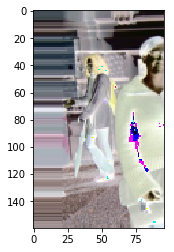

[1. 0.]


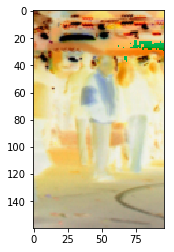

[1. 0.]


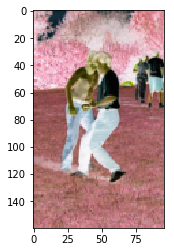

[1. 0.]


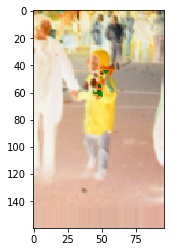

[1. 0.]


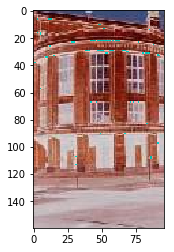

[0. 1.]


In [173]:
showData(training_set, 1014)
x = np.random.randint(0,TEST_PARAMETER * 2, 4)
for i in x:
    showData(test_set,i)
# showData(test_set,202)
# showData(test_set,203)
# showData(test_set,204)

In [174]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
def foo(l, dtype=float):
    return map(dtype, l)

In [175]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
#         self.pool = nn.MaxPool2d(2,2)
#         self.conv1 = nn.Conv2d(3,6,5,stride=1,padding=(2,2))
#         self.conv2 = nn.Conv2d(6,18,5,stride=1,padding=(2,2))
#         self.conv3 = nn.Conv2d(18,27,5,stride=1,padding=(2,2))
#         self.conv4 = nn.Conv2d(27,34,5,stride=1,padding=(2,2))
#         self.fc1 = nn.Linear(6 * 10 * 34, 1024) 
#         self.fc2 = nn.Linear(1024, 512)
#         self.fc3 = nn.Linear(512, 256)
#         self.fc4 = nn.Linear(256,2)

        self.pool = nn.MaxPool2d(2,2)
        self.conv1 = nn.Conv2d(3,6,5,stride=1)
        self.conv2 = nn.Conv2d(6,18,5,stride=1)
        self.conv3 = nn.Conv2d(18,27,5,stride=1)
        self.fc1 = nn.Linear(17 * 33 * 27, 512) 
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 104)
        self.fc4 = nn.Linear(104,2)        

    def forward(self, x):
#         print('shape',x.data.shape)
        x = self.pool(F.relu(self.conv1(x)))
#         print('first layer:',x)
        x = self.pool(F.relu(self.conv2(x)))
#         print('second layer:',x)
        x = F.relu(self.conv3(x))
#         print('third layer:',x)
#         print(x.data.shape)
        x = x.view(-1, 17 * 33 * 27)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
#         print('result: ',x)
        return x
net = Net()
net = net.double()
net = net.cuda()
print(net)

Net(
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 18, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d (18, 27, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=15147, out_features=512)
  (fc2): Linear(in_features=512, out_features=256)
  (fc3): Linear(in_features=256, out_features=104)
  (fc4): Linear(in_features=104, out_features=2)
)


In [184]:
import torch.optim as optim

criterion =  nn.MSELoss()
# optimizer = optim.SGD(net.parameters(), lr = 0.0001, momentum = 0.9)
optimizer = optim.SGD(net.parameters(), lr = 0.00001)

In [185]:
for epoch in range (2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs.double().cuda()), Variable(labels.double().cuda())
        optimizer.zero_grad()
        outputs = net(inputs)
#         if i == 1:
#             print('inputs: ',inputs[0])
#             print('outputs:', outputs[0])
#             print("labels:", labels[0])
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
#         print('loss meme:',loss)
        if(i % 100 == 99):
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
print('finished training')

[1,   100] loss: 0.019
[1,   200] loss: 0.024
[1,   300] loss: 0.012
[1,   400] loss: 0.020
[1,   500] loss: 0.013
[2,   100] loss: 0.017
[2,   200] loss: 0.009
[2,   300] loss: 0.020
[2,   400] loss: 0.025
[2,   500] loss: 0.017
finished training


# Test model

In [186]:
def outputToTensor(labels):
    # print(labels)
    # print(labels.numpy().astype(int))
    tmp = labels.numpy().astype(int)
    # print([ np.where(r==1)[0][0] for r in tmp ])
    tmp = [ np.where(r==1)[0][0] for r in tmp ]
    tmp = np.array(tmp)
    tmp = torch.from_numpy(tmp)
    # print(tmp)
    return tmp

Ground truth :  [0. 1.] [0. 1.] [1. 0.] [0. 1.]
Predicted torch :  
 1
 1
 0
 1
[torch.cuda.LongTensor of size 4 (GPU 0)]

Predicted :  notHuman notHuman human notHuman


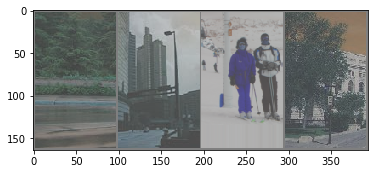

In [254]:
definition = ['human', 'notHuman']

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


dataiter  = iter(testloader)
test_data,labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(test_data))
# print labels
print("Ground truth : ", ' '.join(np.array2string(x.numpy()) for x in labels))

# print('dimensions : ',' '.join(x.numpy().shape for x in images))
# imshow(torchvision.utils.make_grid(test_data))

outputs = net(Variable(test_data.double().cuda()))
# print('outputs:',outputs)
_,predicted = torch.max(outputs.data, 1)
print('Predicted torch : ',predicted )
print('Predicted : ',' '.join(definition[predicted[i]] for i in range(4)))

# print('Predicted :',' '.join('%5s'% classes[int(predicted[j])] for j in range(4) ))

In [280]:
def toCompare(data):
#     print(data.shape)
    arr = np.ones(data.shape[0])
    for i in range(arr.shape[0]):
        if(np.array_equal(data[i].numpy(),np.array([1,0]))):
            arr[i] = 0
    result = torch.from_numpy(arr).double() 
#     print(result)
    return  result
foo(labels)

torch.Size([2, 2])

 1
 1
[torch.DoubleTensor of size 2]




 1
 1
[torch.DoubleTensor of size 2]

In [282]:
correct = 0
total = 0
i = 0
for data in testloader:
    i += 1
    images,labels = data
#     print('raw label : ',labels)
    outputs = net(Variable(images.double().cuda()))
    _,predicted = torch.max(outputs.data, 1)

#     labels = outputToTensor(labels)
    total += labels.size(0)
#     print('predicted : ',predicted)
    compared = toCompare(labels.cpu().double()) == predicted.cpu().double()
#     print('compare result : ', compared)
    correct += (compared).sum()    
print('Accuracy :',(correct/total*100))

Accuracy : 92.85714285714286


In [291]:
print(os.listdir('inria trained model/'))

['first']


# Save the model

In [289]:
name = input('name: ')
PATH = 'inria trained model/' + name
torch.save(net.state_dict(), PATH)
print('saved')

name: first
saved
